#Система выявления самокрутных патронов с незасыпанным порохом

Стрельба - одно из моих хобби. Для снижения затрат, я снаряжаю патроны самостоятельно, но к сожалению, во время снаряжения патрона можно отвлечься и пропустить этап засыпки пороха, что является весьма критичной проблемой, которая при стрельбе выливается в настоящую аварию, устранение которой требует несколько минут и добрую порцию мата.

Взвешивание готового патрона не дает однозначного ответа, т.к. пороховая навеска патрона в калибре 345тк в моей конфигурации составляет около 0,24 грамма (навеска весьма стабильная, погрешность имеющимися весами практически не ловится), а для снаряжения используется незаводская свинцовая пуля, которая немного гуляет по весу.

Задача данного проекта - попрбовать приблизиться к значениям веса патрона, при которых можно сказать, что в него не снаряжен порох. Но для этого необходимо рассмотреть все составные компоненты пули, посмотреть их средние отклонения и попробовать свести это все в единую картину.

# Проводим исследование

## Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import statsmodels.api as sm

## Изучаем пули

### Собираем эмпирические данные

Самый главный параметр, который нас интересует в компонентах - это их вес и насколько он изменчив. Прежде всего соберем эмпирические данные.

Вес всех компонентов указывается в граммах, точность измерения - до сотых.

In [ ]:
bullet_mass = [8.4, 8.39, 8.38, 8.39, 8.38, 8.37, 8.35, 8.37, 8.36, 8.38, 8.34, 8.35, 8.36, 8.34, 8.43, 8.40, 8.39, 8.36, 8.41, 8.38, 8.36, 8.38, 8.31, 8.38, 8.34, 8.35, 8.39, 8.39, 8.36, 8.41, 8.38, 8.38, 8.39, 8.37, 8.39, 8.39, 8.39, 8.37, 8.35, 8.35, 8.35, 8.40, 8.38, 8.37, 8.40, 8.37, 8.38]

In [ ]:
len(bullet_mass)

47

В выборке присутствует 47 пуль. Изначально заказывалась партия в 500 пуль, осталось в наличии около 200-250, размер выборки определялась как сумма двух условий: n>30 и что бы сильно не заморачиваться.

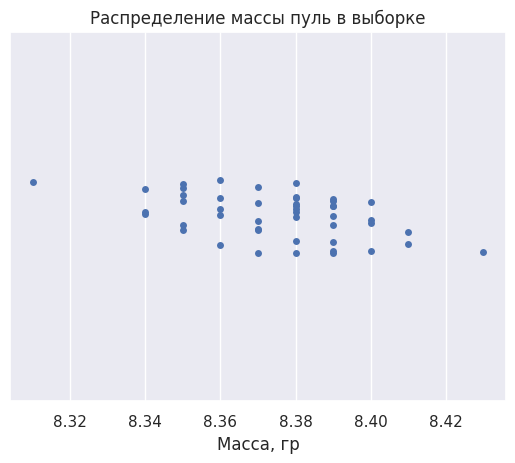

In [ ]:
sns.stripplot(data=pd.DataFrame(bullet_mass), x=bullet_mass, jitter=True)
plt.title('Распределение массы пуль в выборке')
plt.xlabel('Масса, гр');

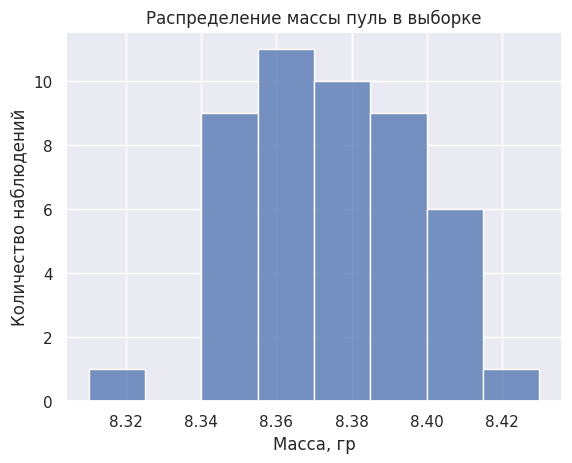

In [ ]:
plt.title('Распределение массы пуль в выборке')
plt.ylabel('Количество наблюдений')
plt.xlabel('Масса, гр')
sns.histplot(data=pd.DataFrame(bullet_mass), x=bullet_mass);


Проверим нормальность распределения полученных значений.

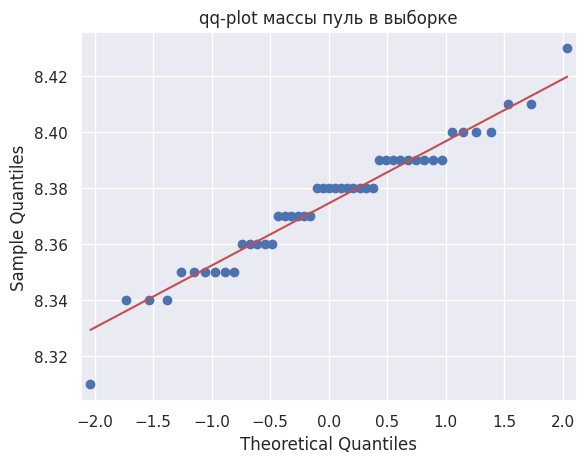

In [ ]:
# Пробую пару разных методов, перепроверка, да и просто интересно пощупать, как работает
fig = sm.qqplot(np.array(bullet_mass), line='s')
plt.title('qq-plot массы пуль в выборке');

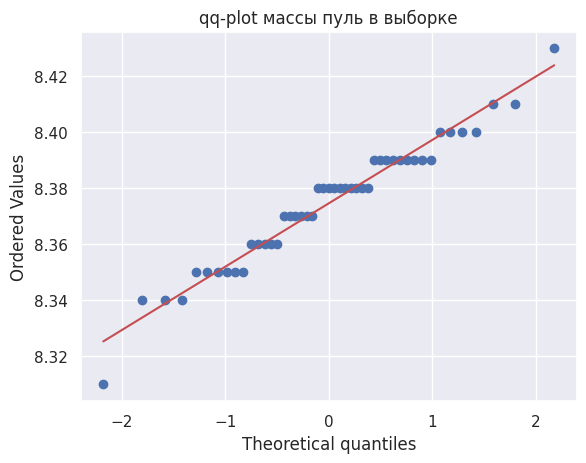

In [ ]:
stats.probplot(bullet_mass, dist="norm", plot=plt);
plt.title('qq-plot массы пуль в выборке');

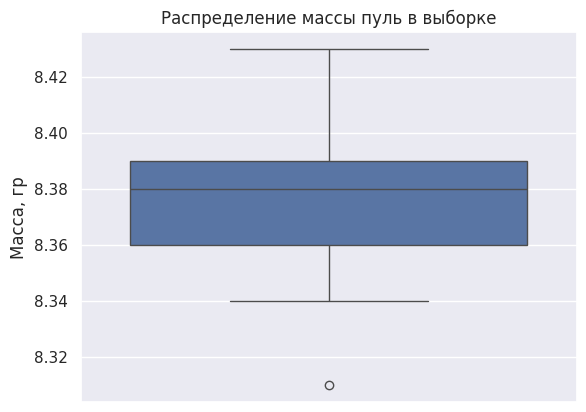

In [ ]:
sns.boxplot(data=bullet_mass)
plt.title('Распределение массы пуль в выборке')
plt.ylabel('Масса, гр');

### Проведем базовые рассчеты

Подсчитаем ряд базовых статистических показаетелей. Так как я практикуюсь и закреляю навыки как в стрельбе, так и в статистике, сначала проведем расчеты руками, потом перепроверим методами из стат. библиотек.

In [ ]:
print(min(bullet_mass), max(bullet_mass))

8.31 8.43


In [ ]:
# среднее зачение по выборке

avg_bullet = sum(bullet_mass)/len(bullet_mass)
avg_bullet

8.374680851063829

In [ ]:
# размах

range_bullet = max(bullet_mass)-min(bullet_mass)
range_bullet

0.11999999999999922

In [ ]:
# Дисперсия

deviation = [(m-avg_bullet)**2 for m in bullet_mass]
dispersion = sum(deviation)/(len(deviation)-1)
dispersion

0.0005037002775208247

In [ ]:
# стандартное отклонение
sd = math.sqrt(dispersion)
sd

0.0224432679777439

In [ ]:
# Стандартная ошибка
se = sd/len(bullet_mass)**0.5
se

0.003273687092758583

Сам производитель пули не указывает, какой вес должен быть точным для пули и указывает вес в диапазоне 8,3-8,4. Для проверки возьмем среднее значение интервала, т.е. 8,35 - его и примем за значение среднего генеральной совокупности.

In [ ]:
# t-тест
t = (avg_bullet - 8.35) / se
t

7.539160086015376

Нехитрыми расчетами мы получаем следующие данные, что т-значение, отклонение нашего выборочного среднего от предполагаемого СГС при 46 степенях свободы составляет 7.53 сигмы. Уже при 6 сигмах pvalue = 2.9e-07. Следовательно гипотезу о том, что средняя выборочная = средняя генеральная при СГС = 8,35 можно отклонить.

In [ ]:
# t-тест
t = (avg_bullet - 8.37) / se
t

1.429840705968424

А вот при СГС = 8,37, t-значение = 1,42  сигмы, и pvalue = 0.162, так что альтернативную гипотезу можно отклонить.

Вероятней всего, средняя генеральной совокупности находится ближе к 8,37 грамма.

Проверим данные предположение при помощи пакета scipy.stats

In [ ]:
a = 8.35
b = 8.37
c = 8.38
d = 8.39

In [ ]:
stats.ttest_1samp(bullet_mass, a)

TtestResult(statistic=7.539160086015916, pvalue=1.4246691871167854e-09, df=46)

In [ ]:
stats.ttest_1samp(bullet_mass, b)

TtestResult(statistic=1.4298407059689662, pvalue=0.15951996108398317, df=46)

In [ ]:
stats.ttest_1samp(bullet_mass, c)

TtestResult(statistic=-1.6248189840550515, pvalue=0.11103432769832665, df=46)

In [ ]:
stats.ttest_1samp(bullet_mass, d)

TtestResult(statistic=-4.679478674078527, pvalue=2.5549580609256117e-05, df=46)

И мы видим, что расчеты проведены верно, выводы верны, но можно уточнить, что средняя ГС вероятнее всего равна 8,38 гр. Движемся дальше.

## Изучаем капсулированные гильзы

Приемной частью для пули является гильза. В рамках нашего исследования откажемся от измерения отдельно гильзы и отдельно капсуля, так как:


1) Капсуль имеет заводское изготовление.

2) Капсуль сам по себе имеет малый вес и точности измерений на имеющихся весах недостаточно, нужно измерять с точностью до тысячных.

В связи с этим, будем измерять вес собранной гильзы.
В дело пошли все имеющиеся под рукой капсулированные гильзы.



In [ ]:
shell_mass = [4.61, 4.60, 4.54, 4.66, 4.66, 4.58, 4.67, 4.58, 4.59, 4.57, 4.63, 4.58, 4.58, 4.54, 4.66, 4.69, 4.64, 4.63 , 4.63, 4.61, 4.57, 4.54, 4.61, 4.57, 4.56, 4.6, 4.66, 4.55, 4.51, 4.54, 4.64, 4.57, 4.6, 4.64, 4.53, 4.58, 4.60, 4.58, 4.54, 4.61, 4.47, 4.6, 4.63, 4.64, 4.56, 4.63, 4.65, 4.65, 4.66, 4.59, 4.58, 4.69, 4.61, 4.5, 4.61, 4.58, 4.53, 4.64, 4.59, 4.63, 4.53, 4.59, 4.54, 4.67]

len(shell_mass)
max(shell_mass)

4.69

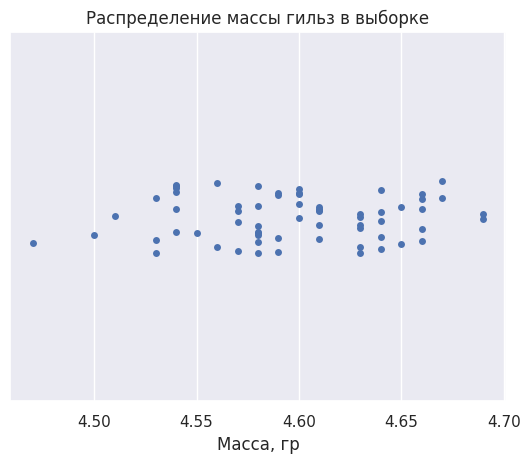

In [ ]:
sns.stripplot(data=pd.DataFrame(shell_mass), x=shell_mass, jitter=True)
plt.title('Распределение массы гильз в выборке')
plt.xlabel('Масса, гр');

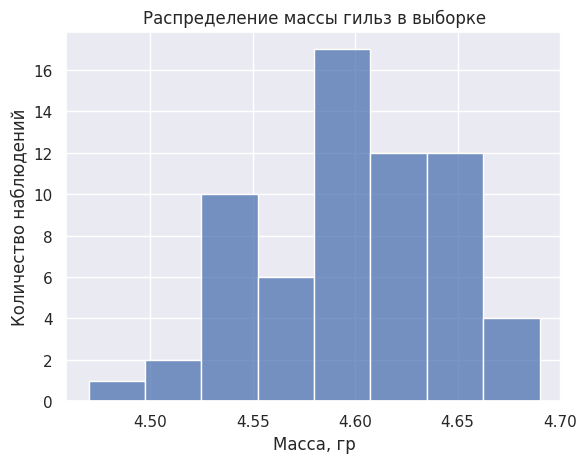

In [ ]:
plt.title('Распределение массы гильз в выборке')
plt.ylabel('Количество наблюдений')
plt.xlabel('Масса, гр')
sns.histplot(data=pd.DataFrame(shell_mass), x=shell_mass);

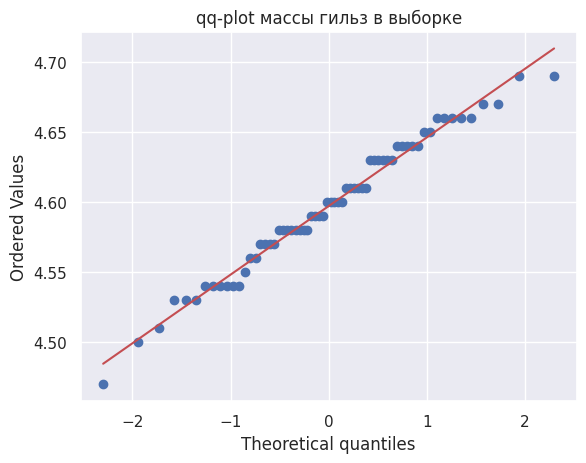

In [ ]:
stats.probplot(shell_mass, dist="norm", plot=plt);
plt.title('qq-plot массы гильз в выборке');

Очередной раз можно убедиться, что гистограмма не всегда дает в полной мере оценить нормальность распределения полученных данных и qq-plot справляется с этой задачей гораздо наглядней.

In [ ]:
print(min(shell_mass), max(shell_mass))

4.47 4.69


In [ ]:
# размах

range_shell = max(shell_mass)-min(shell_mass)
range_shell

0.22000000000000064

In [ ]:
#ср_значение
avg_shell = sum(shell_mass)/len(shell_mass)
avg_shell

4.597187499999999

In [ ]:
# Дисперсия

shell_deviation = [(m-avg_shell)**2 for m in shell_mass]
shell_dispersion = sum(shell_deviation)/(len(shell_deviation)-1)
shell_dispersion

0.002328472222222224

In [ ]:
# стандартное отклонение
sd_shell = math.sqrt(shell_dispersion)
sd_shell

0.04825424563934477

А вот и весьма интересный момент - гильза имеет больший размах и отклонение по весу нежели пуля, несмотря на мои первоначальные предположения.

Возможно дело в том, что гильза для калибра 345тк изготавливается путем обрезки автоматной гильзы 5.45х39 из патронов, которые идут на утилизацию. Гильзы эти изготавливались на множестве различных заводов и могут между собой иметь некоторые допуски, не говоря уже о том, как может производится процедура обрезки гильзы. (Привет, Техкрим)

Кроме того, гильзы лакированы, и проходя несколько циклов отстрела/сборки лаковое покрытие стирается, тоже внося погрешности по весу. Добавим сюда также некотурую погрешность капсуля, которым снаряжается гильза.

Таким образом, вес гильзы - крайне многосоставной фактор.

Для результатов стрельбы - это хорошо, пуля в партии стабильна по весу, что дает воспроизводимость результата, а вот ловить патрон без навески пороха становится сложнее.

## Изучаем и сравниваем собранные патроны с макетами

Снова соберем выборки - это будут уже снаряженные патроны и макеты патронов, но уже без пороха. Выборки будут состоять из 33 патронов и макетов соответственно.

In [ ]:
bullets_loaded = [13.26, 13.11, 13.16, 13.14, 13.18, 13.22, 13.15, 13.27, 13.15, 13.22, 13.09, 13.23, 13.22, 13.20, 13.23, 13.20, 13.23, 13.16, 13.16, 13.18, 13.19, 13.24, 13.15, 13.21, 13.09, 13.20, 13.11, 13.16, 13.14, 13.18, 13.21, 13.14, 13.08]

len(bullets_loaded)

33

In [ ]:
no_powder_bullet = [13.09, 12.88, 12.88, 13.08, 12.96, 13.01, 13.03, 12.97, 12.98, 13.01, 12.96, 12.92, 12.97, 12.96, 12.95, 13.03, 12.92, 13.01, 12.94, 12.98, 13, 12.97, 13.01, 13.01, 12.82, 12.94, 12.92, 13.06, 12.93, 12.98, 13.04, 13, 12.9]
len(no_powder_bullet)

33

Проверим нормальность распределения полученных значений.

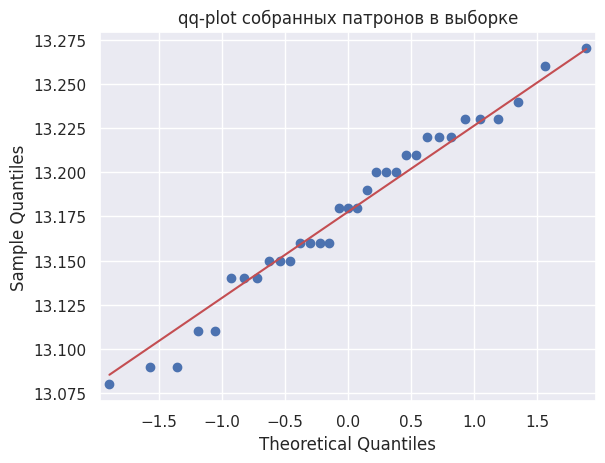

In [ ]:
fig = sm.qqplot(np.array(bullets_loaded), line='s')
plt.title('qq-plot собранных патронов в выборке');

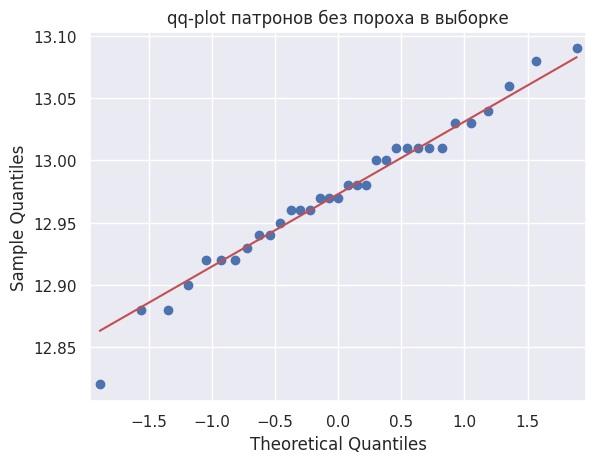

In [ ]:
fig = sm.qqplot(np.array(no_powder_bullet), line='s')
plt.title('qq-plot патронов без пороха в выборке');

Оба метода показывают идентичный результат. Значения распределены не идеально, но вполне нормально. Теперь выделим пересекающиеся  диапазоны масс патронов с порохом и без.

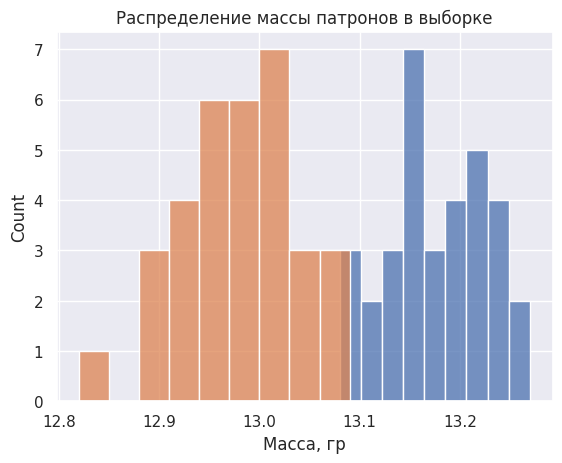

In [ ]:
sns.histplot(data=pd.DataFrame(bullets_loaded), x=bullets_loaded, bins=9);
sns.histplot(data=pd.DataFrame(no_powder_bullet), x=no_powder_bullet, bins=9)
plt.title('Распределение массы патронов в выборке')
plt.xlabel('Масса, гр');

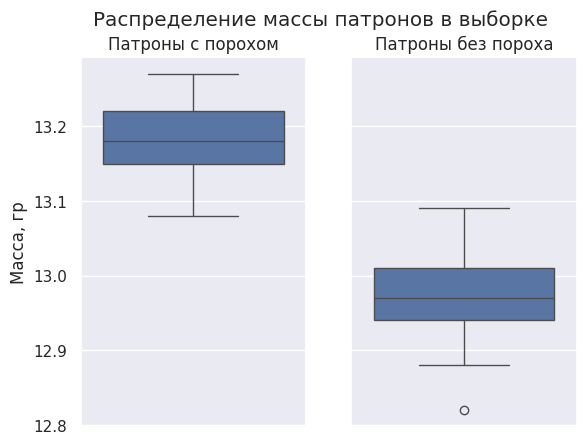

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
plt.suptitle('Распределение массы патронов в выборке')

plt.subplot(121)
plt.title('Патроны с порохом')
plt.ylabel('Масса, гр')
sns.boxplot(data=bullets_loaded, ax=axes[0])

plt.subplot(122)
sns.boxplot(data=no_powder_bullet, ax=axes[1])
plt.ylabel('Масса, гр')
plt.title('Патроны без пороха');

Конечно и так видно, что средние двух выборок сильно различаются, но ради мемов проверим.

In [ ]:
stats.ttest_ind(bullets_loaded, no_powder_bullet)

TtestResult(statistic=15.244994506182733, pvalue=5.563821581698673e-23, df=64.0)

Наблюдаемый интересующий нас диапазон массы - 13.09-13.07. Посмотрим точнее в каких значениях пересекаются наборы данных.

In [ ]:
intersection_mass = pd.Series(bullets_loaded)[pd.Series(bullets_loaded).isin(no_powder_bullet)]
print(intersection_mass)

10    13.09
24    13.09
32    13.08
dtype: float64


In [ ]:
# Смотрим, в каком количестве встречаются снаряженные порохом патроны в указаном весовом диапазоне
pd.Series(bullets_loaded)[pd.Series(bullets_loaded).isin(intersection_mass)].value_counts()

13.09    2
13.08    1
dtype: int64

In [ ]:
# Смотрим, в каком количестве встречаются неснаряженные порохом патроны в указаном весовом диапазоне
pd.Series(no_powder_bullet)[pd.Series(no_powder_bullet).isin(intersection_mass)].value_counts()

13.09    1
13.08    1
dtype: int64

Итого получается, что вероятность того что патрон в данном весовом сегменте не снаряжен порохом будет составлять 2/5=0,4=40%, и чем ниже будет его масса, тем выше вероятность этого события.

### Определяем точные границы по массе для отбраковки патронов

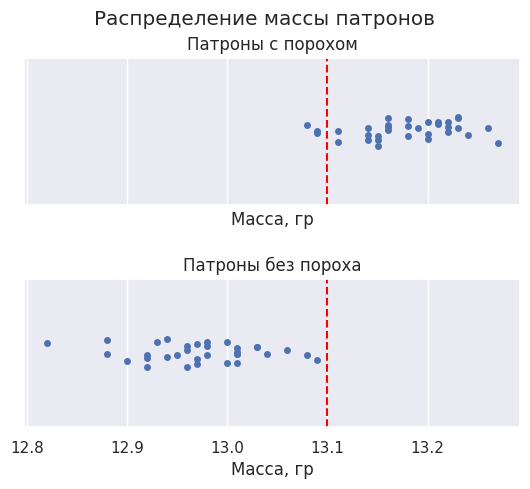

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True)
plt.suptitle('Распределение массы патронов')
plt.subplots_adjust(hspace=0.5);

plt.subplot(211)
plt.title('Патроны с порохом')
plt.xlabel('Масса, гр')
sns.stripplot(data=pd.DataFrame(bullets_loaded), x=bullets_loaded, jitter=True)
plt.axvline (x=13.1, color='red', linestyle='--');

plt.subplot(212)
plt.title('Патроны без пороха')
plt.xlabel('Масса, гр')
sns.stripplot(data=pd.DataFrame(no_powder_bullet), x=no_powder_bullet, jitter=True)
plt.axvline (x=13.1, color='red', linestyle='--');

В данном случае, наиболее разумной отсечкой по весу собранного патрона будет показатель в 13.1 грамм. Даже самые крайние отклонения макетов по весу не пересекают эту условную черту, а при подготовке патронов к ответсвенному мероприятию (охота или соревнования, например) снаряженные патроны с массой менее 13.1 грамм лучше отложить, а лучше контрольно разобрать. Повторный выстрел с застрявшей в стволе пулей может привести к разрыву ствола, а значит отправлению в утилизацию единицы оружия.

# Итоговые выводы

Подведем итоги исследования:

1. В рамках исследовательского анализа компонентов патрона и их вклада в совокупную массу боеприпаса была выявленно, что вопреки первоначальной гипотезе о том, что наибольшую погрешность вносит именно масса пули, выявленно, что наибольшим размахом по весу обладает гильза

2. Признать нормальным диапазоном веса снаряженного патрона с навеской пороха в 0,24 грамм (Irbis 32) в диапазоне [13,1:13,3]

3. Патроны с массой 13,09 и ниже стоит подвергать отбраковке и разборке. Однако, стоит учесть, что в диапазоне 13,08-13,09 периодически попадаются снаряженные патроны. Если железобетонно уверен, что не пропустил засыпку пороха при снаряжении - go ahead.

